In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### 1. Dataset


In [2]:
dataset = pd.read_csv("mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [3]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

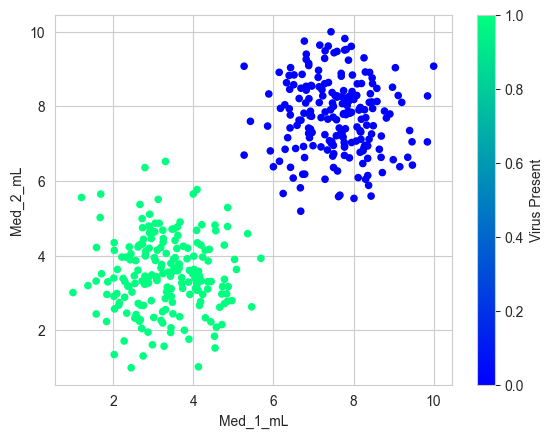

In [8]:
dataset.plot.scatter(x='Med_1_mL',y='Med_2_mL', c='Virus Present', colormap='winter')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Modèle


In [12]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [14]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

### 3. Fonction Coût 


In [15]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient


In [16]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [17]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction


In [18]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 6. modele finlal

In [19]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

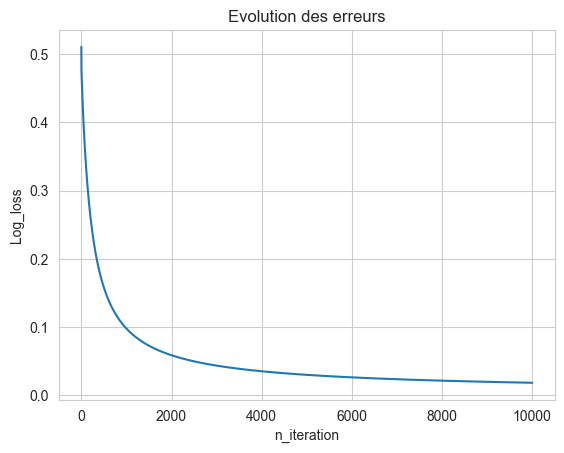

In [20]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [21]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[8.46860805e-03]
 [9.94515847e-01]
 [5.96276616e-03]
 [4.46663461e-04]
 [9.73488893e-01]
 [4.56114834e-04]
 [1.60883411e-02]
 [9.87703995e-01]
 [9.88865747e-01]
 [1.97314689e-03]
 [9.84719145e-01]
 [9.88955025e-01]
 [2.30501377e-03]
 [2.11112599e-03]
 [9.95219502e-01]
 [9.50966208e-01]
 [9.47491418e-01]
 [3.42057375e-03]
 [8.87610943e-01]
 [5.95484917e-03]
 [9.98036436e-01]
 [6.65550039e-04]
 [9.08956073e-04]
 [1.36763445e-02]
 [5.92403618e-03]
 [7.17749625e-04]
 [2.46497509e-04]
 [9.98586174e-01]
 [1.22978914e-02]
 [4.02854091e-03]
 [9.97252765e-01]
 [6.99413217e-01]
 [9.97323610e-01]
 [1.15881726e-03]
 [4.35650847e-03]
 [1.99662643e-03]
 [8.05285808e-01]
 [9.91779625e-01]
 [1.75062871e-02]
 [9.62764451e-03]
 [9.83016790e-01]
 [1.51208602e-03]
 [9.94171853e-01]
 [5.06531259e-03]
 [7.78437687e-04]
 [9.92886169e-01]
 [1.87541159e-02]
 [9.99360243e-01]
 [1.93049763e-04]
 [5.56669974e-04]
 [9.88102645e-01]
 [9.60533305e-01]
 [1.17726116e-03]
 [9.96833974e-01]
 [7.82190642e-03]
 [9.960785

[0.99999843]
[ True]
[0.99994607]
[ True]
[0.99998934]
[ True]


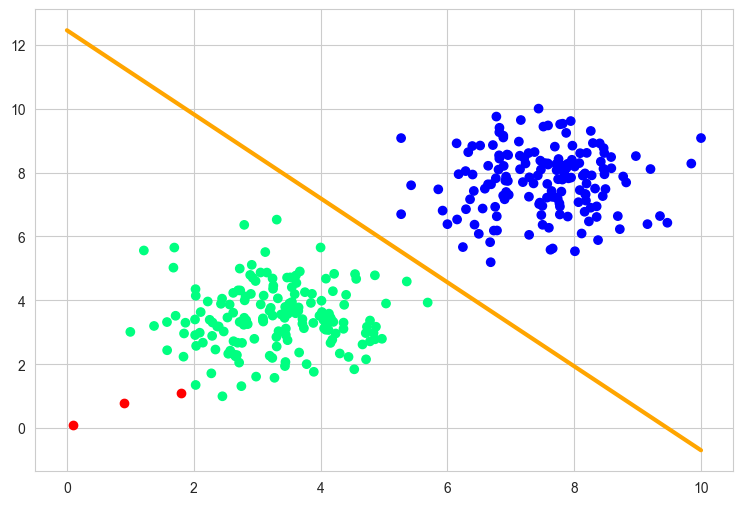

In [29]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([0.1,0.1])
new_2=np.array([1.8,1.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [25]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8.46860805e-03]
 [9.94515847e-01]
 [5.96276616e-03]
 [4.46663461e-04]
 [9.73488893e-01]
 [4.56114834e-04]
 [1.60883411e-02]
 [9.87703995e-01]
 [9.88865747e-01]
 [1.97314689e-03]
 [9.84719145e-01]
 [9.88955025e-01]
 [2.30501377e-03]
 [2.11112599e-03]
 [9.95219502e-01]
 [9.50966208e-01]
 [9.47491418e-01]
 [3.42057375e-03]
 [8.87610943e-01]
 [5.95484917e-03]
 [9.98036436e-01]
 [6.65550039e-04]
 [9.08956073e-04]
 [1.36763445e-02]
 [5.92403618e-03]
 [7.17749625e-04]
 [2.46497509e-04]
 [9.98586174e-01]
 [1.22978914e-02]
 [4.02854091e-03]
 [9.97252765e-01]
 [6.99413217e-01]
 [9.97323610e-01]
 [1.15881726e-03]
 [4.35650847e-03]
 [1.99662643e-03]
 [8.05285808e-01]
 [9.91779625e-01]
 [1.75062871e-02]
 [9.62764451e-03]
 [9.83016790e-01]
 [1.51208602e-03]
 [9.94171853e-01]
 [5.06531259e-03]
 [7.78437687e-04]
 [9.92886169e-01]
 [1.87541159e-02]
 [9.99360243e-01]
 [1.93049763e-04]
 [5.56669974e-04]
 [9.88102645e-01]
 [9.60533305e-01]
 [1.17726116e-03]
 [9.96833974e-01]
 [7.82190642e-03]
 [9.960785

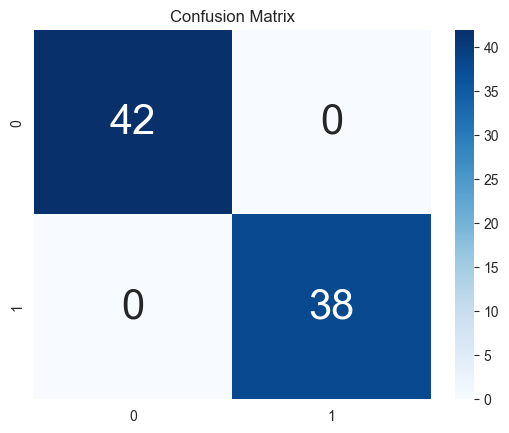

In [26]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [27]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_train, W, b)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[9.51390751e-01]
 [1.17741061e-02]
 [9.77183706e-01]
 [9.86605347e-01]
 [9.99429792e-01]
 [8.98456219e-04]
 [9.97958613e-01]
 [1.20294716e-01]
 [9.99339462e-01]
 [9.90966872e-01]
 [9.76658223e-01]
 [8.90255621e-04]
 [1.58660009e-01]
 [8.02927502e-01]
 [9.92446427e-01]
 [8.20603898e-03]
 [5.50377595e-04]
 [1.89027558e-03]
 [4.76099774e-03]
 [5.26413192e-03]
 [3.01852239e-03]
 [9.99861391e-01]
 [1.88156362e-02]
 [9.99876563e-01]
 [4.07656044e-04]
 [3.24778586e-03]
 [9.83076454e-01]
 [2.14739281e-03]
 [9.92245676e-01]
 [9.99298439e-01]
 [3.31273006e-03]
 [1.39521065e-02]
 [9.96822792e-01]
 [4.28227279e-03]
 [9.98770436e-01]
 [1.11033036e-03]
 [9.89768888e-01]
 [9.86395536e-01]
 [6.83281948e-05]
 [1.68135285e-03]
 [9.99298460e-01]
 [9.69671895e-01]
 [8.35538068e-03]
 [4.40009097e-03]
 [5.61241292e-02]
 [9.81067844e-01]
 [1.23247403e-02]
 [9.96694783e-01]
 [2.49504118e-02]
 [7.30794862e-03]
 [9.97039517e-01]
 [2.17275512e-01]
 [9.98805231e-01]
 [1.14212612e-03]
 [9.86666023e-01]
 [9.725638

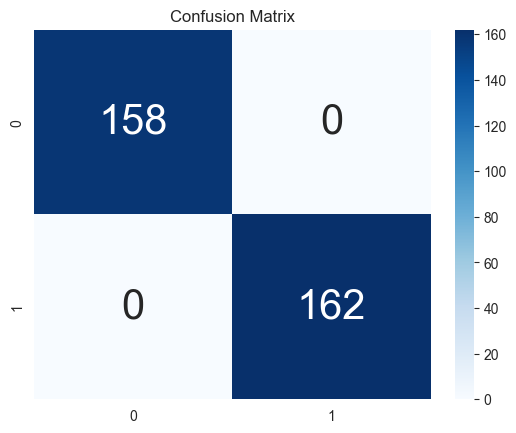

In [28]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()